In [1]:
import random
import matplotlib.pyplot as plt

# Experiments
import sys
sys.path.append('../..')

from model.amm.basilisk_amm import ConstantProductPoolState
from model.amm.agents import Agent
from model.amm.global_state import GlobalState
from model.amm.trade_strategies import TradeStrategies

from model import run, plot_utils, processing

# same seed, same parameters = same simulation result
random.seed(42)

initial_state = GlobalState(
    pools = {
        'R1/R2': ConstantProductPoolState(
            tokens={
                'R1': 500000,
                'R2': 1500000
            },
            trade_fee=0.1
        )
    },
    agents = {
        'Trader': Agent(
            holdings={'R1': 1000000, 'R2': 1000000},
            trade_strategy=TradeStrategies.random_swaps(pool='R1/R2', amount={'R1': 333, 'R2': 1000}, randomize_amount=True)
        )
    }
)

events = run.run(initial_state, time_steps=5000)

events = processing.postprocessing(events)

Starting simulation...
Execution time: 1.265 seconds.
processing set()


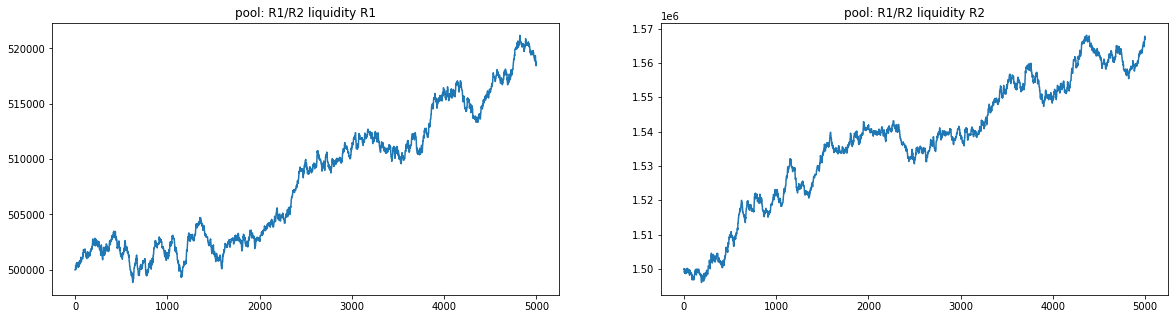

In [3]:
plot_utils.plot(events, pool='R1/R2', prop='liquidity')

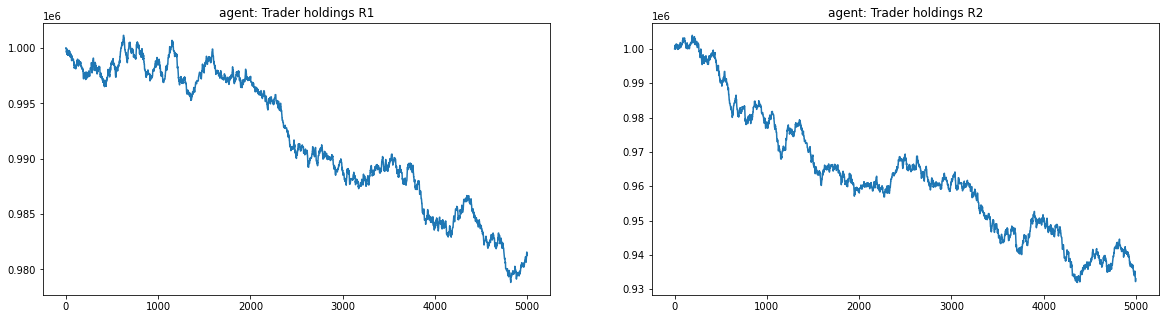

In [4]:
plot_utils.plot(events, agent='Trader', prop='holdings')